# Telco Churn Analysis

Dataset Info: Data set containing Telco customer data and customers left last month

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataC = pd.read_csv(r'C:\Users\pphirke\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [3]:
dataC.head()   #top 5 records view

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking the attributes of the data like rows and cols

In [4]:
dataC.shape

(7043, 21)

Checking the values in columns

In [5]:
dataC.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Checking the data types of all the columns

In [6]:
dataC.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Check the descriptive statistics of numeric values

In [7]:
dataC.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### SeniorCitizen:
* SeniorCitizen is a categorical.
* Only a small percentage 16.2% of customers are senior citizens, suggesting that the majority of customers are not senior citizens.

#### Tenure:
* The tenure distribution shows a wide range with an average of about 32 months. A significant portion of customers have relatively short tenures, as indicated by the 25th percentile (9 months), while the longest tenure is 72 months.

#### Monthly Charges:
* Monthly charges vary widely, with an average charge of around dollars 64.76. The distribution indicates that half of the customers are paying dollars 70.35 or less per month, with some customers paying as high as dollars 118.75.


## Target Variable Count

In [8]:
dataC['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0, 0.5, 'Count')

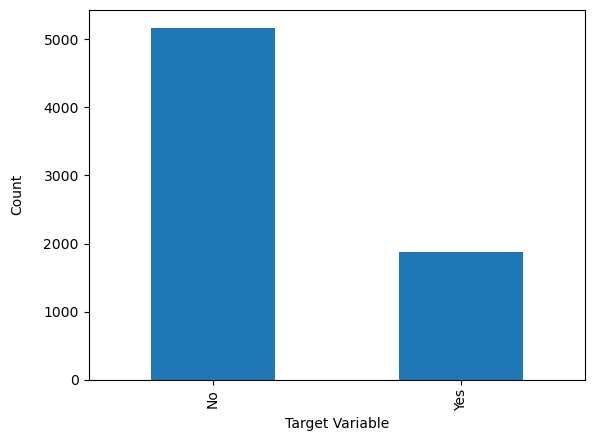

In [9]:
dataC['Churn'].value_counts().plot(kind='bar')
plt.xlabel("Target Variable")
plt.ylabel("Count",labelpad =14)

In [10]:
dataC['Churn'].value_counts()*100/len(dataC["Churn"])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

### Analysis:
* No (non-churners):73.46%
* Yes (Churners):26.54%

In this case the **'Churn'** data is somewhat imbalanced since the **'Yes' class is less than 30%** of the total. Although it is not extremely imbalanced, we analyse the data with other features while taking target values separately to get some insights.

##### Note:- To determine if the data is imbalanced, we generally look for significant disparities between the classes. In the context of binary classification (like predicting churn), data is often considered imbalanced if one class constitutes less than 30% of the total instances.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
dataC.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


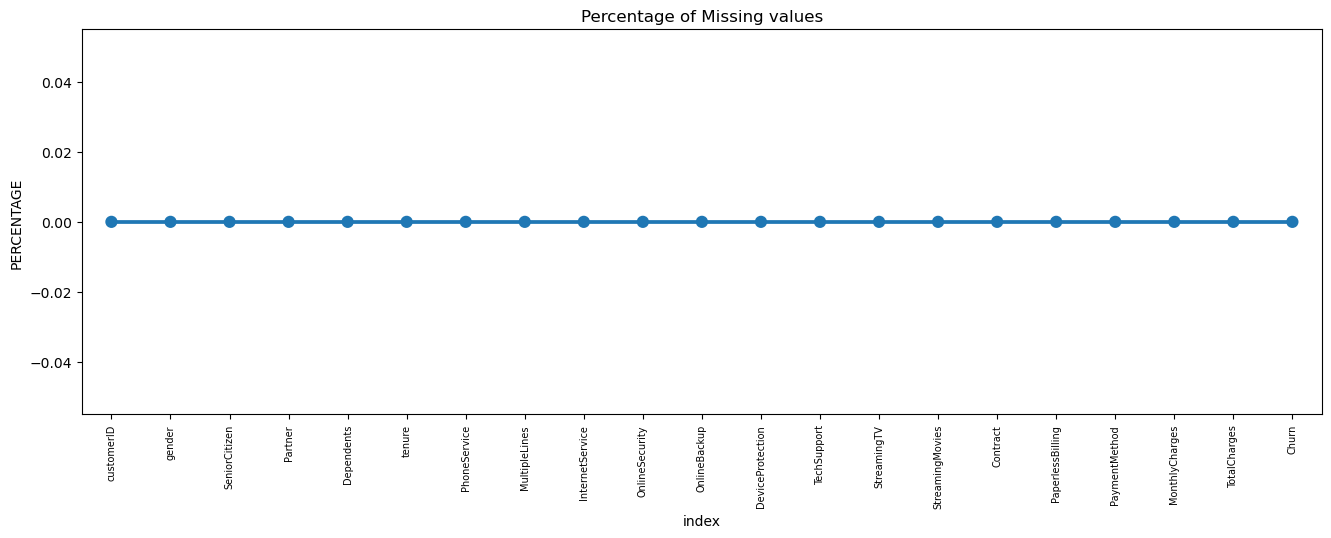

In [12]:
missing = pd.DataFrame((dataC.isnull().sum()) * 100 / dataC.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")

plt.show()


#### Missing Data - no missing data, can proceed with analysis without any adjustments.

## Data Cleaning

#### 1. Created a copy of base data for manupulation and processing of data

In [13]:
telco_data = dataC.copy()    #created copy of base data for manupulation and processing

#### 2. Converting to numerical data type for Total charges

In [14]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges,errors='coerce') #converted totalcharges to numeric datatype
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### 3. As we can see there are 11 missing values in TotalCharges column

In [15]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### 4. Treating missing values

Since this records are very low compared to total dataset, ignore these records from further processing.

In [16]:
telco_data.dropna(how='any',inplace=True)

In [17]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]  #checking if null columns droppped or not

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### 5. Created bins based on the tenure

In [18]:
print(telco_data['tenure'].max())  #max tenure

72


In [19]:
labels = ["{0} - {1}".format(i , i+11) for i in range(1,72,12)]
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1,80,12), right=False, labels=labels)

In [20]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

#### 6. Remove unwanted columns

In [21]:
telco_data.drop(columns=['customerID','tenure'], axis=1, inplace=True)

In [22]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## EDA

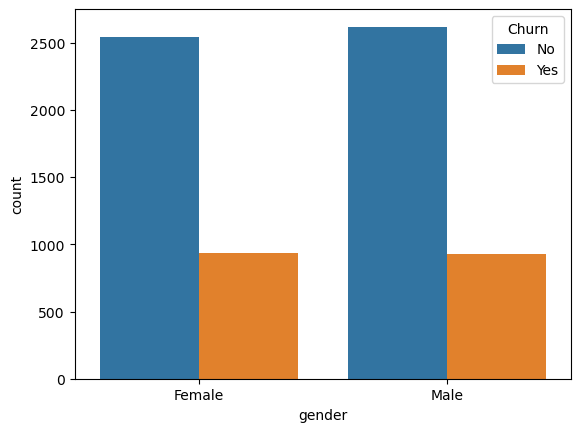

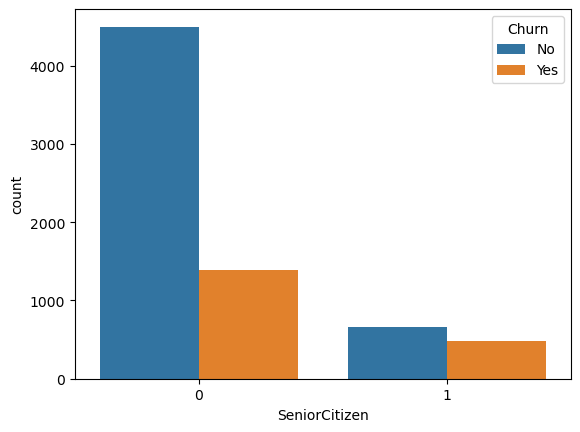

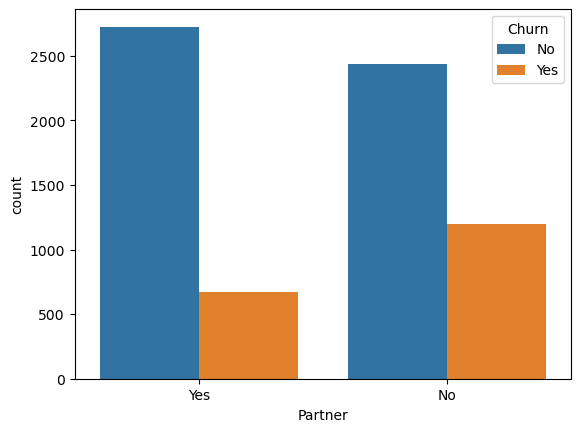

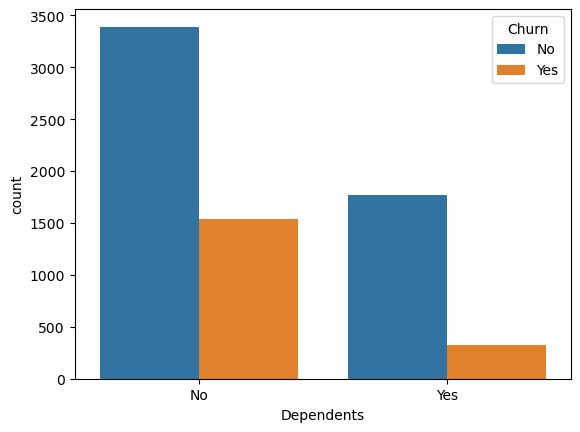

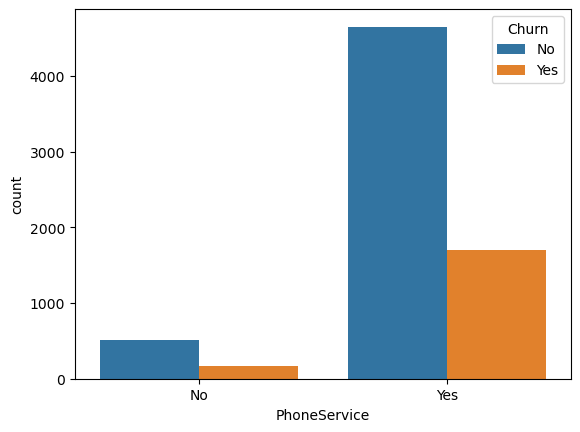

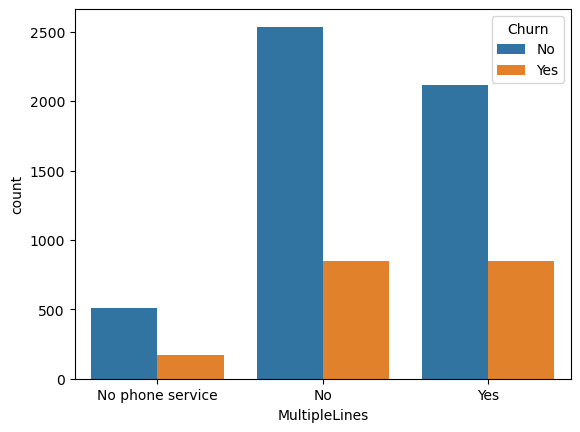

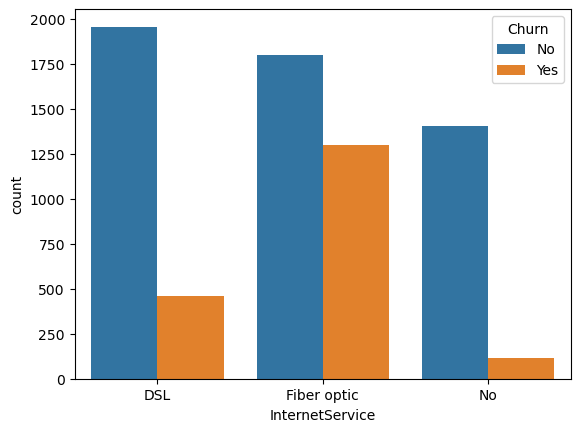

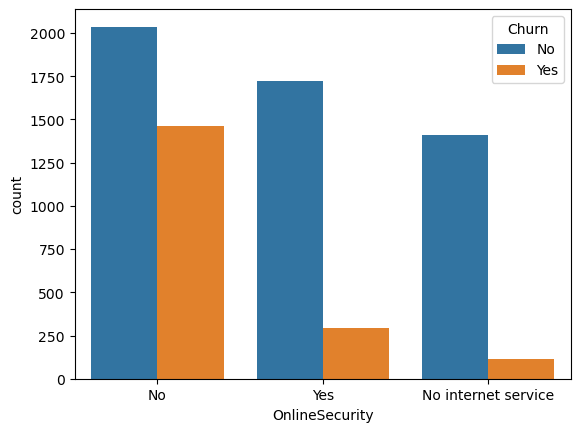

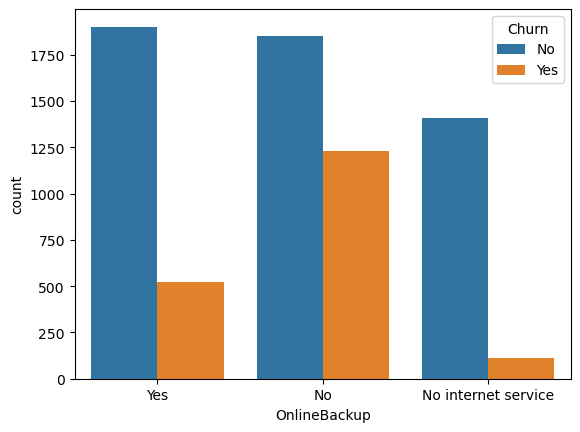

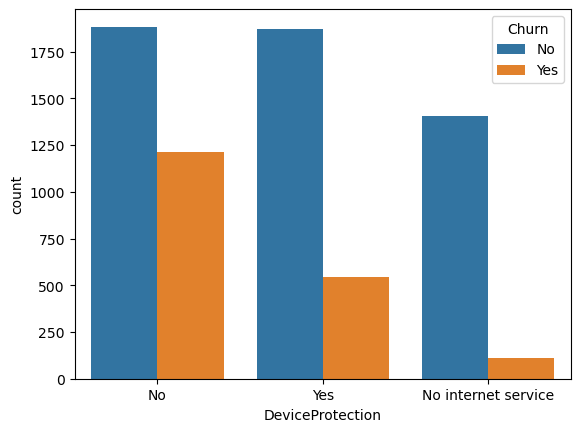

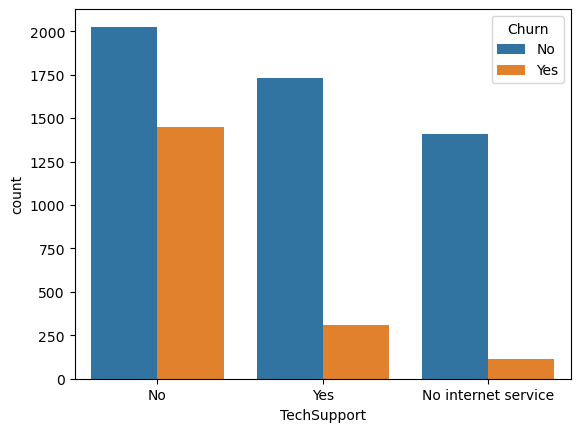

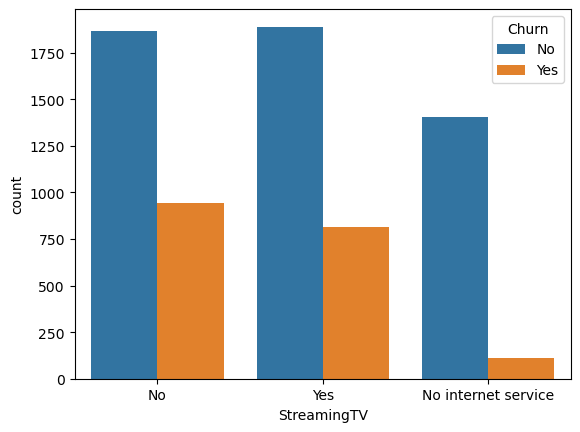

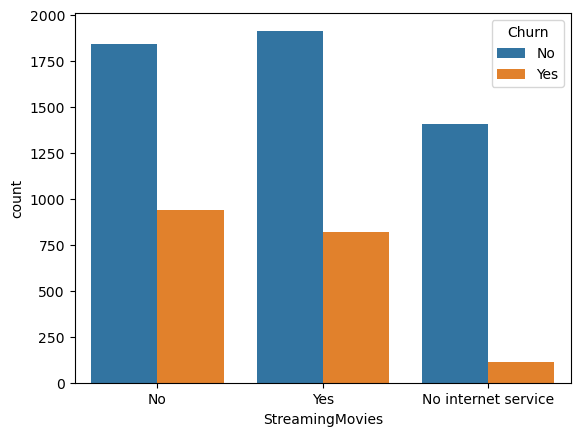

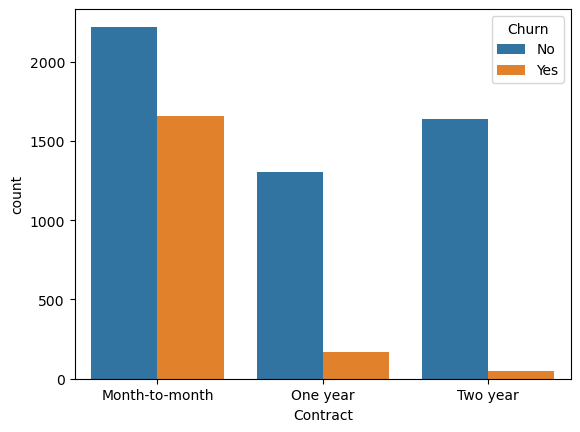

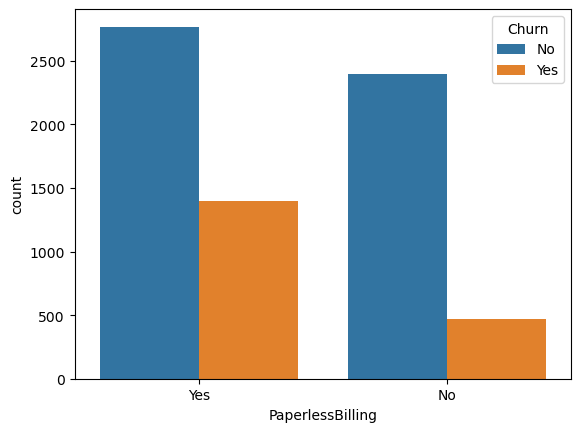

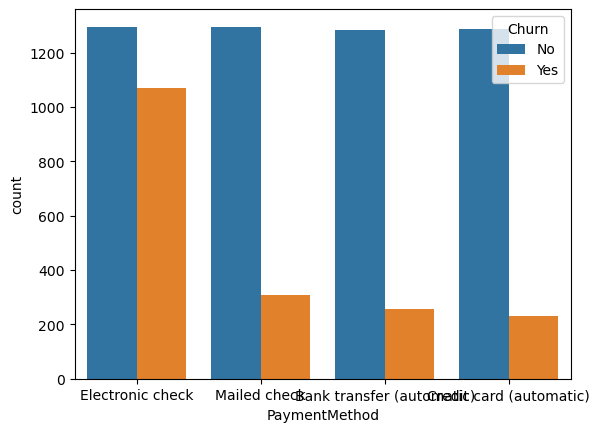

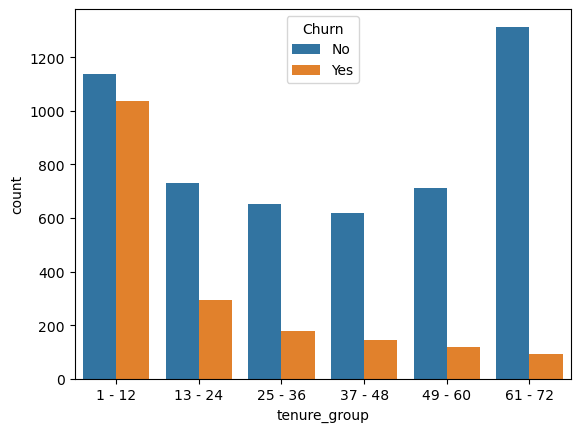

In [24]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor,hue='Churn')

In [25]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [26]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [27]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


##### Relationship between Monthly Charges and Total Charges

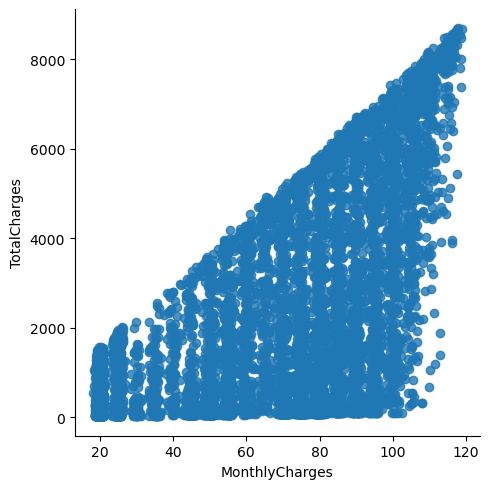

In [28]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges',y='TotalCharges',fit_reg=False)

C:\Users\pphirke\AppData\Local\Temp\ipykernel_45472\3517156075.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mon = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 0)],
C:\Users\pphirke\AppData\Local\Temp\ipykernel_45472\3517156075.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mon = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 1)],


Text(0.5, 1.0, 'Monthly charges by Churn')

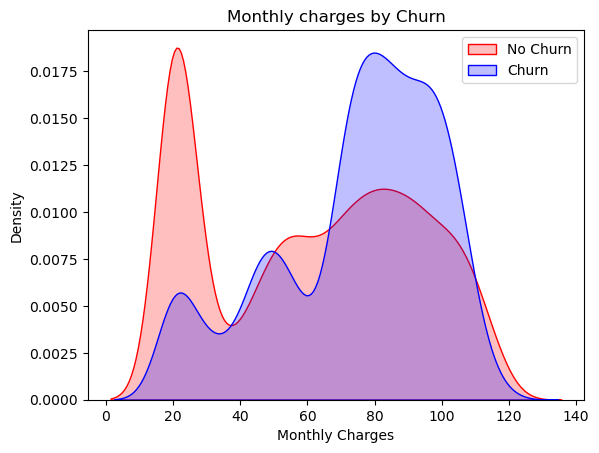

In [29]:
mon = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 0)],
                 color='Red', shade=True)
mon = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 1)],
                 color="Blue",shade=True)
mon.legend(["No Churn","Churn"],loc='upper right')
mon.set_ylabel('Density')
mon.set_xlabel('Monthly Charges')
mon.set_title('Monthly charges by Churn')

### Insights for Monthly Charges by Churn

* This indicates that customer facing higher monthly charges are more likely to churn.
* Possible reasons could be dissatisfaction with the service, finding better deals elsewhere, or financial constraints.

C:\Users\pphirke\AppData\Local\Temp\ipykernel_45472\196023649.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  toc = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 0)],
C:\Users\pphirke\AppData\Local\Temp\ipykernel_45472\196023649.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  toc = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 1)],


Text(0.5, 1.0, 'Total charges by Churn')

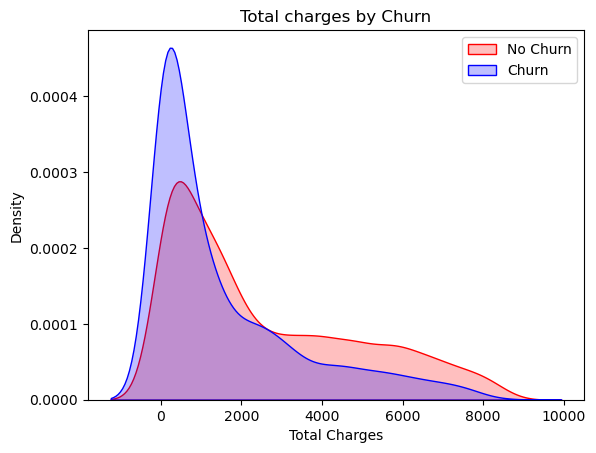

In [30]:
toc = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 0)],
                 color='Red', shade=True)
toc = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 1)],
                 color="Blue",shade=True)
toc.legend(["No Churn","Churn"],loc='upper right')
toc.set_ylabel('Density')
toc.set_xlabel('Total Charges')
toc.set_title('Total charges by Churn')

### Insights Total Charges by Churn

* This suggests that customers with lower total  charges are more likely to churn.
* Possible reasons could include dissatisfaction with the service, finding better deals elsewhere, or financail constraints.
* The combination of higher monthly charges, lower tenure, and lower total charges indicates a group of customers who are at high risk of churning.


Build a Corelation of all predictors with **Churn**

<Axes: >

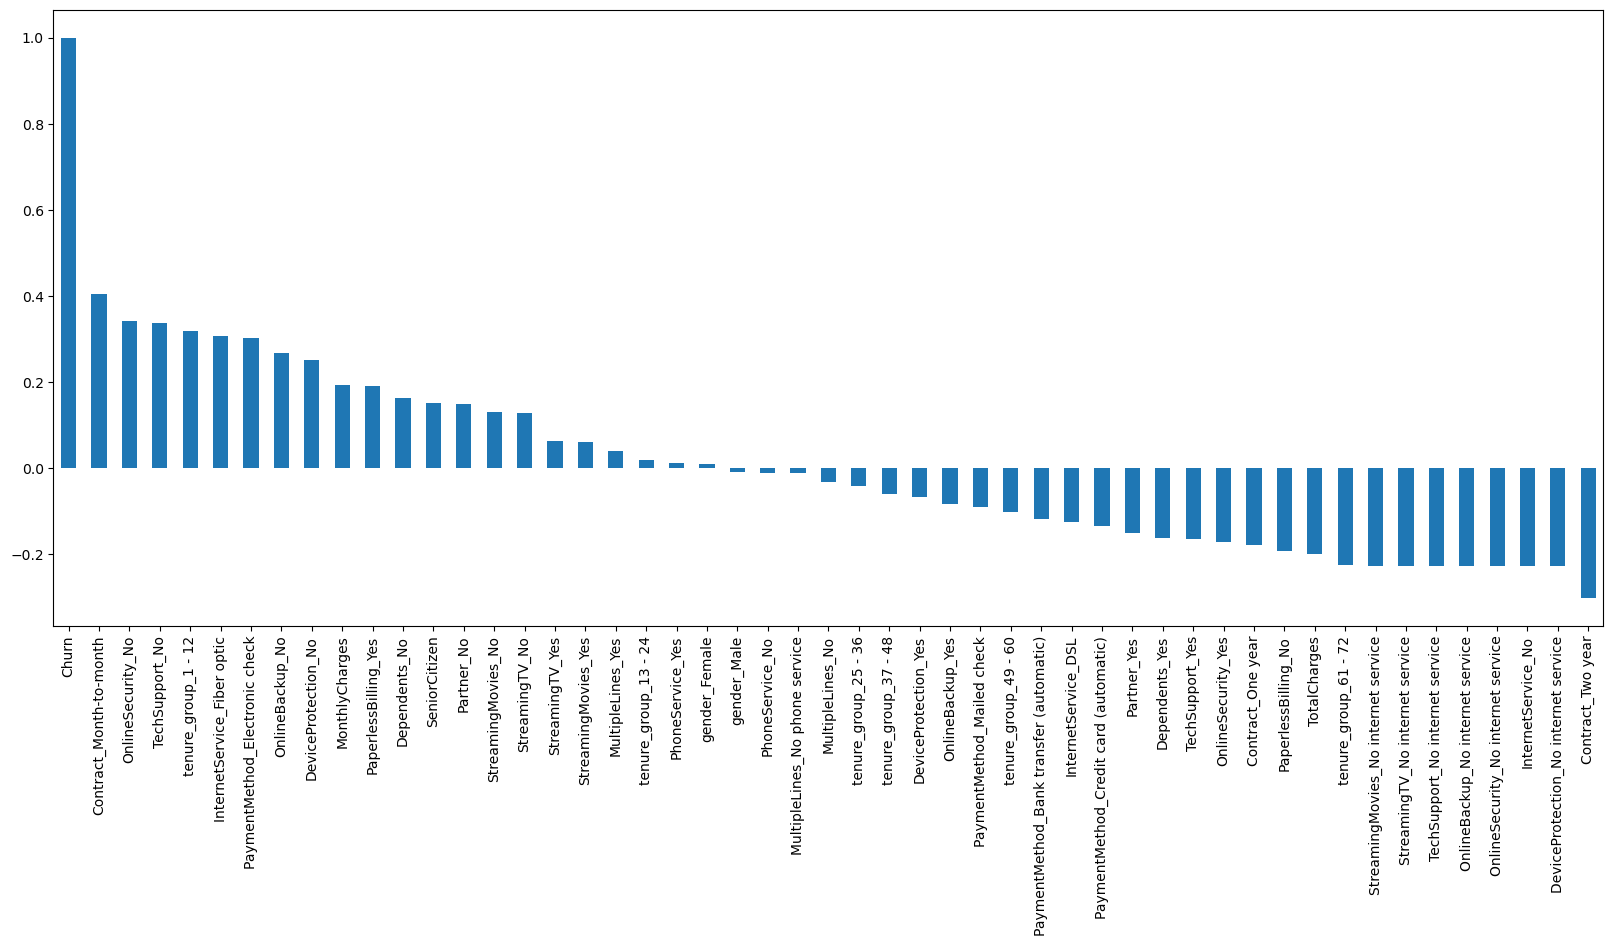

In [31]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

### Derived Insights

#### High Churn:
* Observed in month-to-month contracts.
* Linked to customers without online security.
* Associated with no technical support.
* Common in the first year of subscription.
* Higher with Fiber Optics Internet service.

#### Low Churn:
* Seen in long-term contracts.
* Present in subscriptions without internet service.
* Noted among customers with more than 5 years of engagement.

#### Miimal Impact on Churn:
* Gender.
* Availability of phone service.
* Number of multiple lines.

In [32]:
target0 = telco_data.loc[telco_data["Churn"]==0]
target1 = telco_data.loc[telco_data["Churn"]==1]

In [33]:
def uniplot(df, col, title, hue=None):
    # Set seaborn style and context
    sns.set_style('whitegrid')
    sns.set_context('talk')
    
    # Update matplotlib parameters for better visuals
    plt.rcParams.update({
        "axes.labelsize": 16,
        "axes.titlesize": 20,
        "axes.titlepad": 30,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
        "figure.titlesize": 24
    })

    # Create a temporary series for hue
    temp = pd.Series(data=hue)
    
    # Initialize figure and axes
    fig, ax = plt.subplots()
    
    # Calculate the width of the plot
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Use logarithmic scale for the y-axis
    plt.yscale('log')
    
    # Set the title of the plot
    plt.title(title, pad=30, fontweight='bold', color='darkblue')
    
    # Create the count plot with enhanced visuals
    ax = sns.countplot(
        data=df, 
        x=col, 
        order=df[col].value_counts().index, 
        hue=hue, 
        palette='Set2'
    )
    
    # Add labels to the axes
    ax.set_xlabel(col.replace('_', ' ').capitalize(), fontweight='bold', color='darkred')
    ax.set_ylabel('Count (log scale)', fontweight='bold', color='darkred')
    
    # Annotate the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                    fontsize=12, color='black', fontweight='bold')
    
    # Adjust the legend
    if hue:
        ax.legend(title=hue.replace('_', ' ').capitalize(), loc='upper right', frameon=True, title_fontsize='13', fontsize='11')
    
    # Remove grid lines for a cleaner look
    ax.grid(False)
    
    # Show the plot with tight layout for better spacing
    plt.tight_layout()
    plt.show()

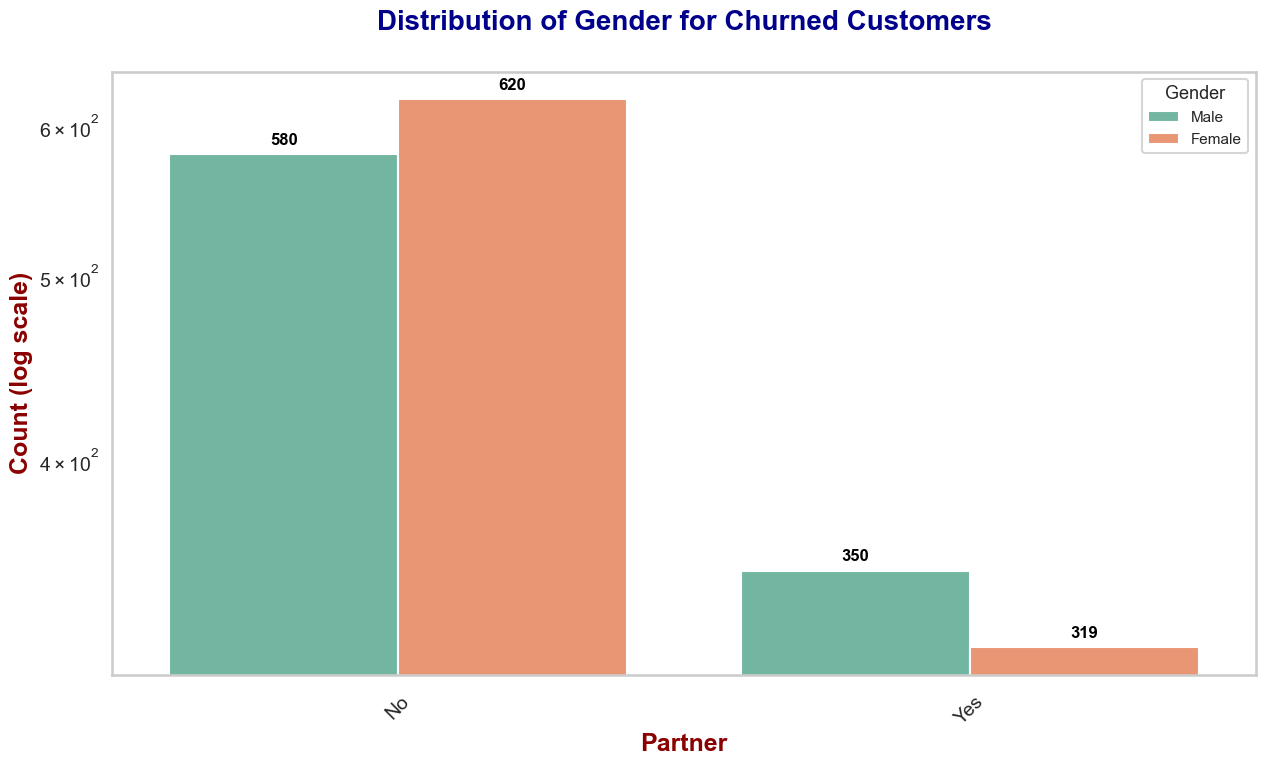

In [34]:
uniplot(target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')


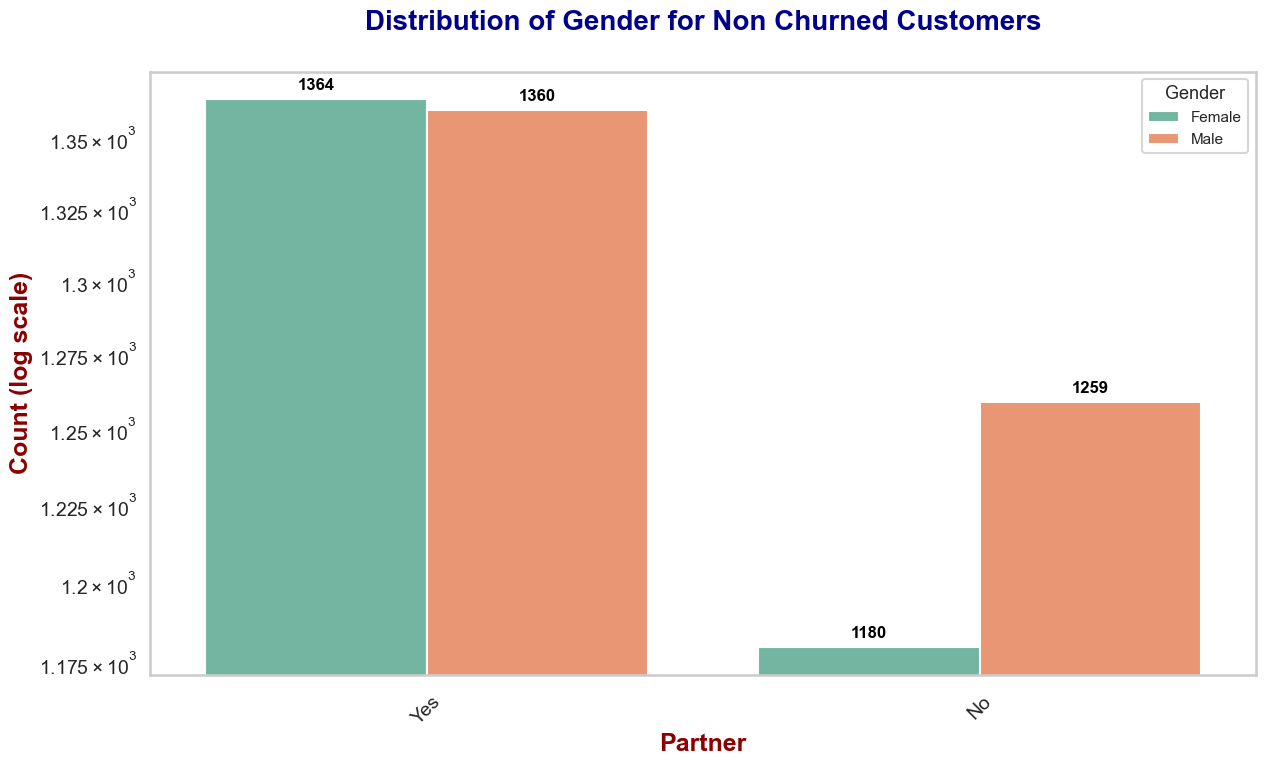

In [35]:
uniplot(target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


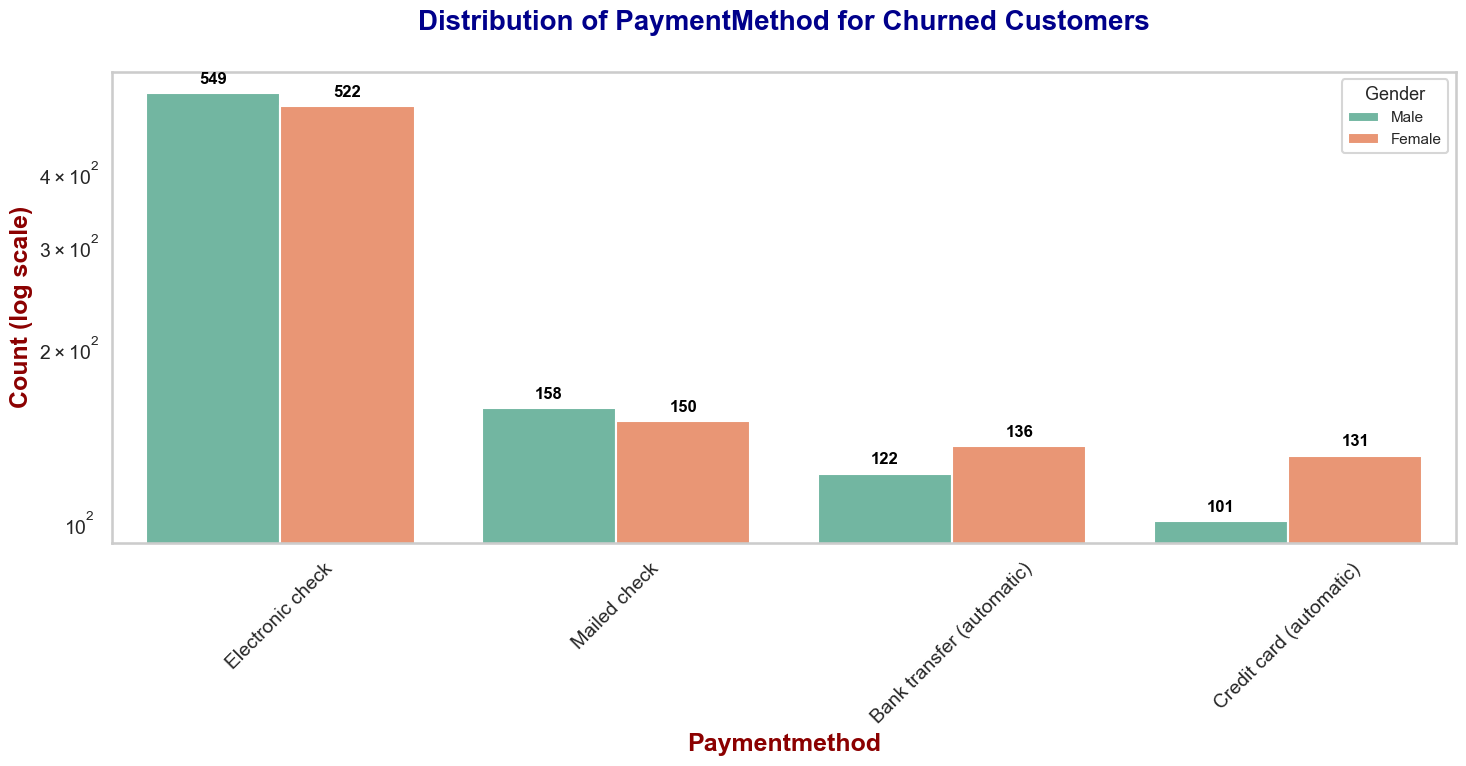

In [36]:
uniplot(target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


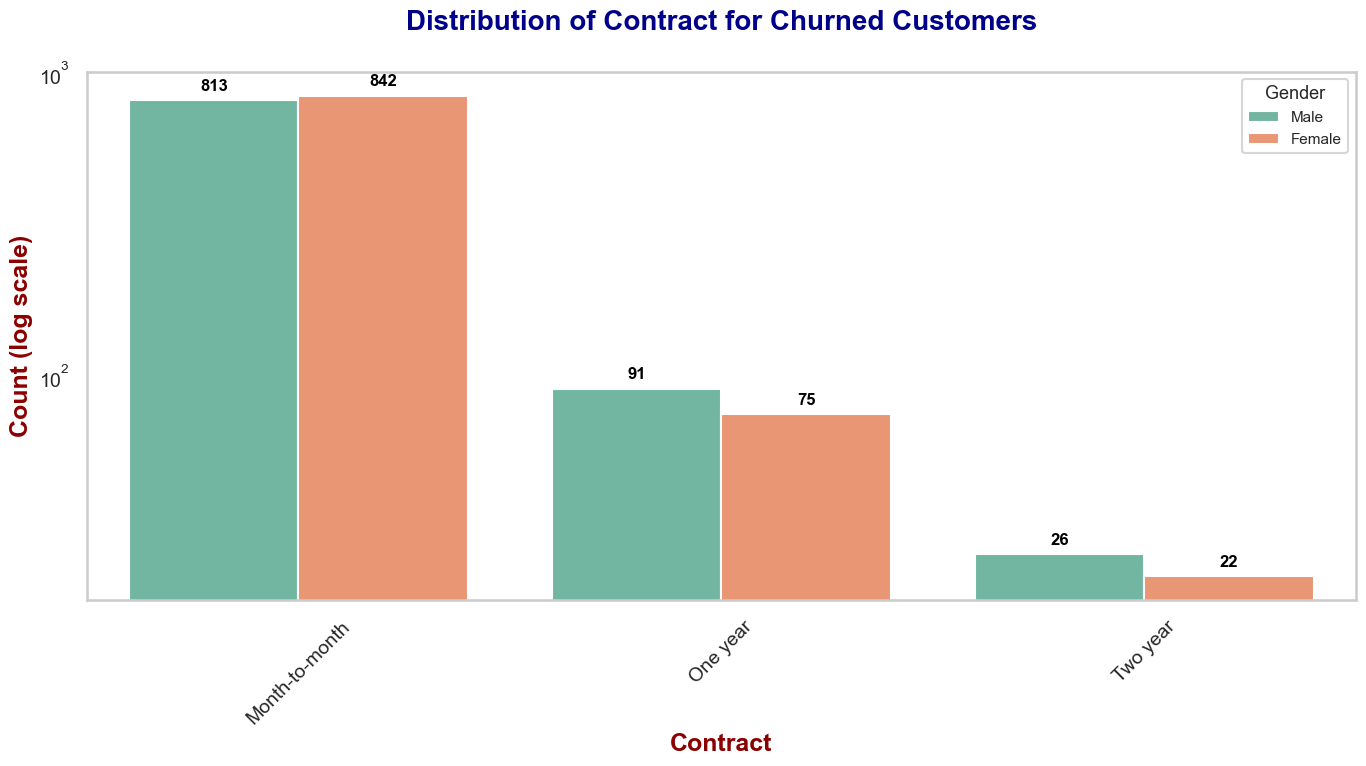

In [37]:
uniplot(target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


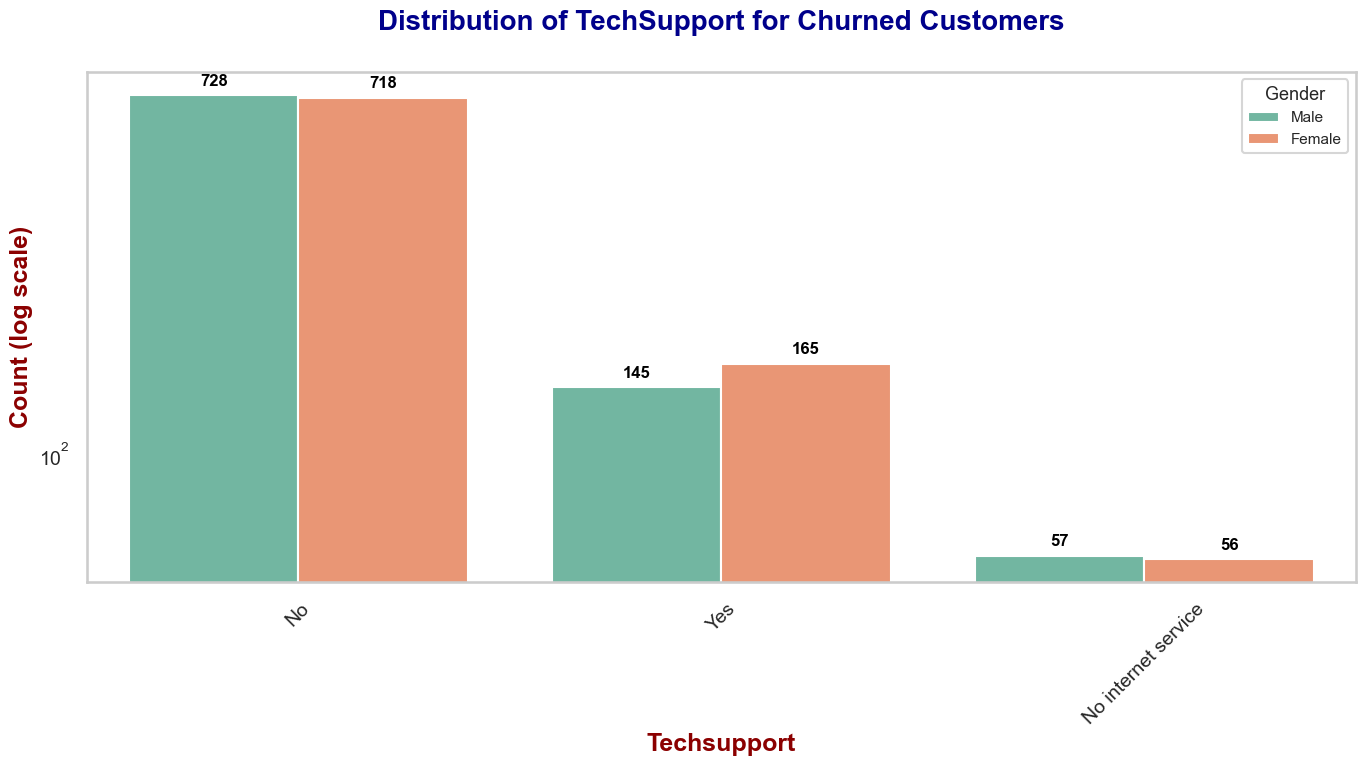

In [38]:
uniplot(target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


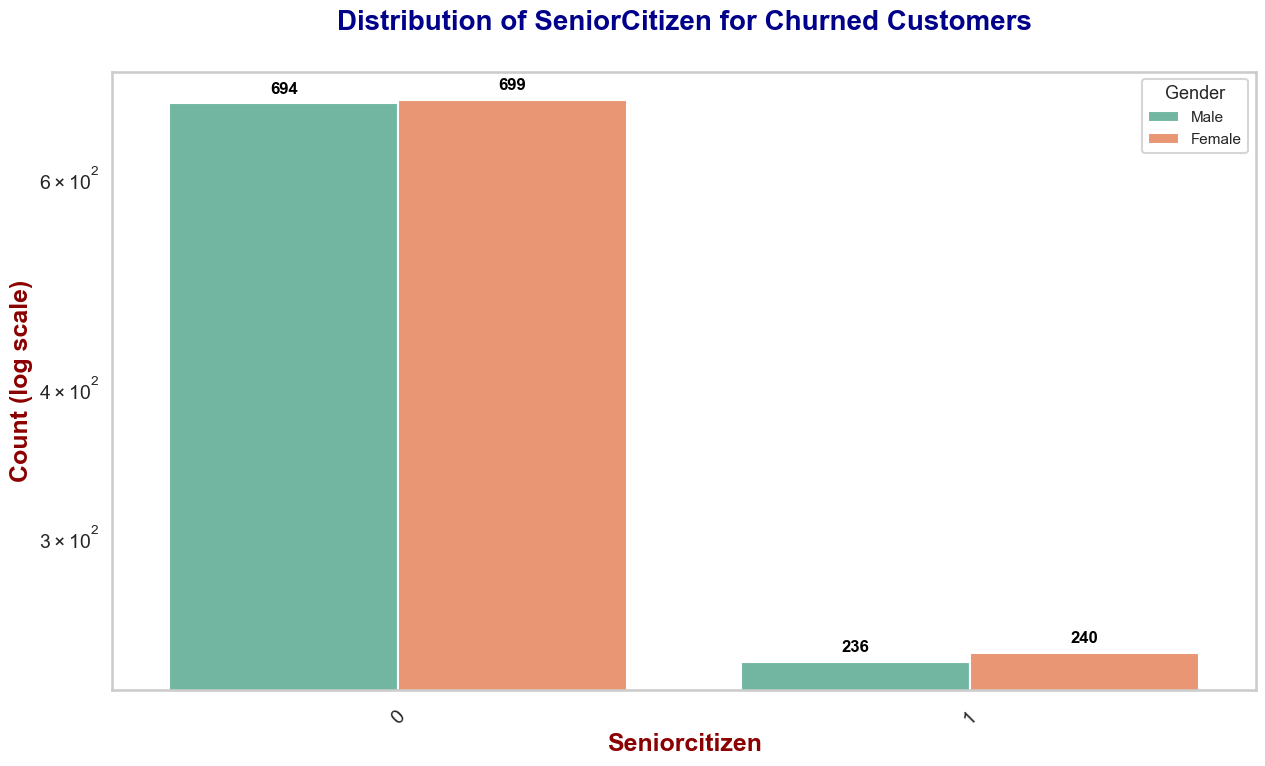

In [39]:
uniplot(target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


### Exploratory Data Analysis Conclusion

* **Electronic Check Medium are the Highest Churners:** Customers using the Electronic Check payment method have the highest churn rate.
* **Contract Type - Monthly Customers are More Likely to Churn:** Monthly contract customers are more likely to churn because they have no long-term commitment and can easily switch providers.
* **No Online Security and No Tech Support Category are High Churners:** Customers without online security services and tech support are more likely to churn, indicating that these services may be important for customer retention.
* **Non-Senior Citizens are High Churners:** Non-senior citizens exhibit a higher churn rate compared to senior citizens, possibly due to differing service needs or satisfaction levels.